<a href="https://colab.research.google.com/github/TheLadyJack/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
# TODO - code!

In [2]:
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):

   # True Positive Rate: 100%
   p_pos_user = 1
   # Prior 
   p_user = prob_drunk_prior
   # False Positive Rate: 1%
   p_pos_non_user = false_positive_rate
   # Complement of our prior
   p_non_user = 1 - p_user

   numerator = p_pos_user*p_user
   denominator = (p_pos_user)*(p_user) + (p_pos_non_user)*(p_non_user)

   # Posterior Probability
   return numerator / denominator

prob_drunk_given_positive((1/1000), 0.08)
#probability of true pos after one run

0.012357884330202669

In [3]:
prob_drunk_given_positive(0.01235, 0.08)
#probability of true pos after two runs

0.13517655042577878

In [10]:
#necessary tests
def super_prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):
   dot = 1
   posterior = prob_drunk_prior
   while posterior < .95:

      dot += 1

      p_pos_user = 1
      # Prior test is new prior 
      p_user = posterior
      # False Positive Rate: 1%
      p_pos_non_user = false_positive_rate
      # Complement of our prior
      p_non_user = 1 - p_user
      # Posterior Probability
      numerator = p_pos_user*p_user
      denominator = (p_pos_user)*(p_user) + (p_pos_non_user)*(p_non_user)
      posterior = numerator / denominator
   else:
      return posterior, dot


super_prob_drunk_given_positive((1/1000), 0.08)


(0.9606895076105054, 5)

In [0]:
#it would take five positive runs to achieve the level of confidence required

In [12]:
from scipy import stats
import numpy as np
import pandas as pd
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
df = pd.read_csv('house-votes-84.data', names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])


df = df.replace({"y": 1, "n": 0, "?": np.NaN})
rep = df[df['party']=='republican']
dem = df[df['party']=='democrat']

--2020-02-19 22:50:13--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2020-02-19 22:50:13 (615 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [24]:
CI, _, _ = stats.bayes_mvs((rep['water-project'].dropna()), alpha=.95)

CI

Mean(statistic=0.5067567567567568, minmax=(0.42526571045979167, 0.5882478030537219))

In [40]:
CI[1][0]

0.42526571045979167

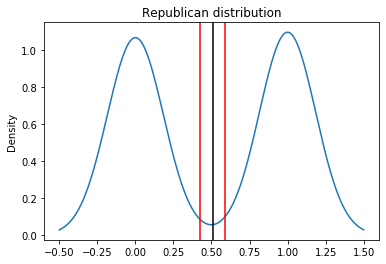

In [41]:
import matplotlib.pyplot as plt

rep['water-project'].dropna().plot.density()
plt.title("Republican distribution")
plt.axvline(x=CI[0], color='black')
plt.axvline(x=CI[1][0], color='red')
plt.axvline(x=CI[1][1], color='red');
plt.show()
#this is a mostly useless graph, due to the intense bimodal nature of this issue

In [0]:
#3)  Frequentist stats take a large sample size to derive an answer, Bayesian stats takes one sample and checks it, potentially mutltiple times, to derive an answer. 
# for rare phenomena, Bayes works grand, but there is a level of bias implicit at the early stages of Bayesian stats that 

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!